In [1]:
import os
import numpy as np
np.random.seed(0)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
height, width, channels = 32, 32, 3
num_classes = 4

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)))
#model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [3]:
dataset_folder = 'datasets/2016-06-30---2019-10-03---1d---10'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True
    )

train_generator = train_datagen.flow_from_directory(
    f'{dataset_folder}/train',
    target_size=(height, width),
    batch_size=32,
    class_mode='sparse')

val_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = val_datagen.flow_from_directory(
    f'{dataset_folder}/val',
    target_size=(height, width),
    batch_size=32,
    class_mode='sparse')


Found 4529 images belonging to 4 classes.
Found 565 images belonging to 4 classes.


In [4]:
history = model.fit_generator(
    train_generator,
    #steps_per_epoch=500,
    epochs=15,
    validation_data=validation_generator,)
    #validation_steps=800)

Epoch 1/15
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
142/142 [==============================] - 16s 110ms/step - loss: 1.0056 - val_loss: 0.7154
Epoch 2/15
142/142 [==============================] - 14s 96ms/step - loss: 0.7275 - val_loss: 0.7037
Epoch 3/15
142/142 [==============================] - 14s 96ms/step - loss: 0.7107 - val_loss: 0.6996
Epoch 4/15
142/142 [==============================] - 13s 94ms/step - loss: 0.6960 - val_loss: 0.6868
Epoch 5/15
142/142 [==============================] - 13s 95ms/step - loss: 0.6897 - val_loss: 0.6912
Epoch 6/15
142/142 [==============================] - 13s 95ms/step - loss: 0.6777 - val_loss: 0.7074
Epoch 7/15
142/142 [==============================] - 13s 94ms/step - loss: 0.6728 - val_loss: 0.6960
Epoch 8/15
142/142 [==============================] - 13s 94ms/step - loss: 0.6554 - val_loss: 0.6772
Epoch 9/15
142/142 [==============================] - 13s 95ms/step - loss: 0.6354 - val_

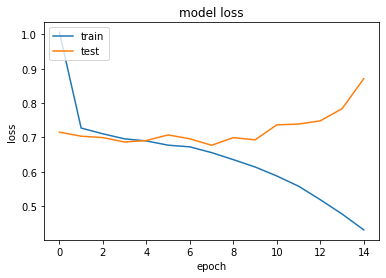

In [5]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
print(history.history.keys())


NameError: name 'history' is not defined